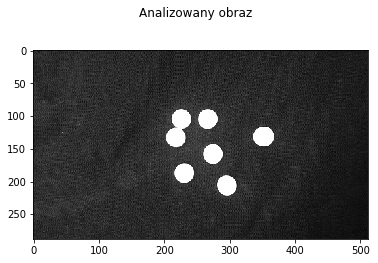

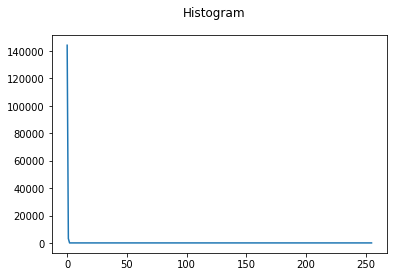

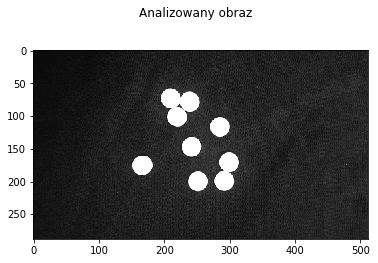

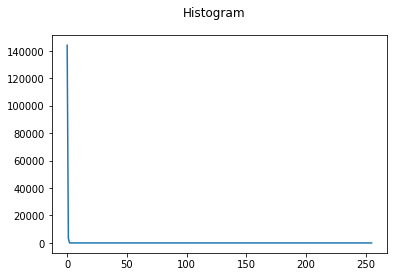

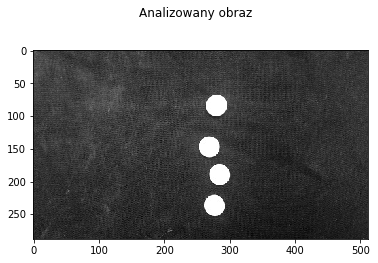

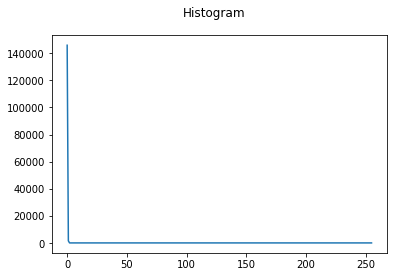

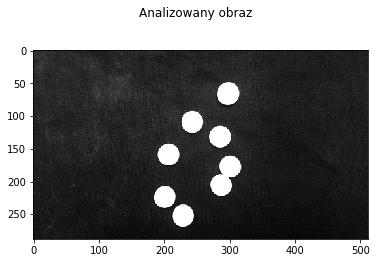

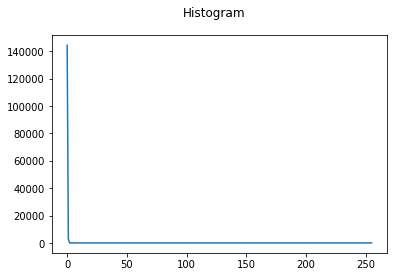

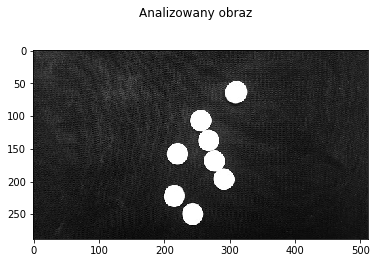

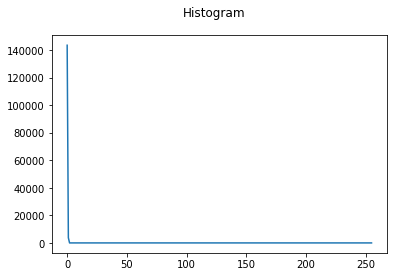

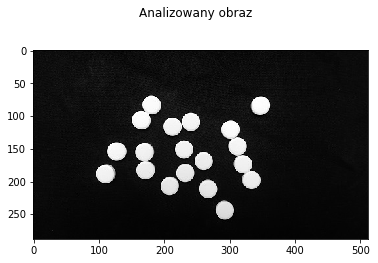

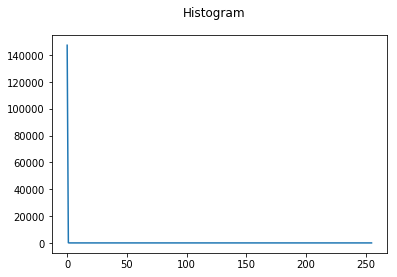

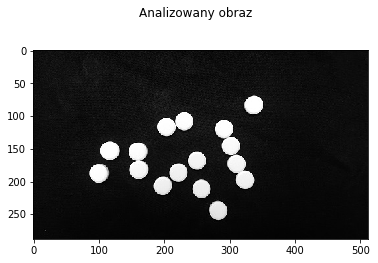

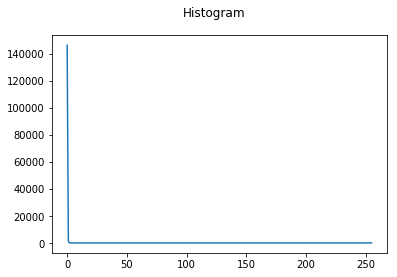

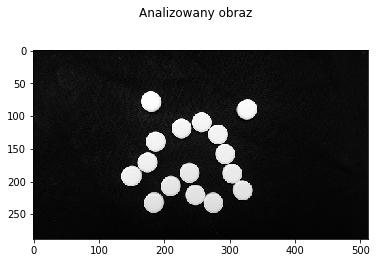

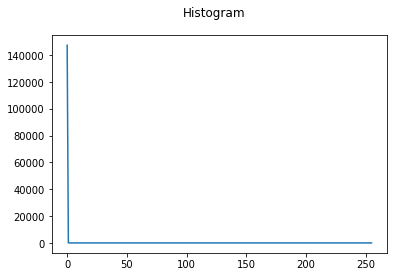

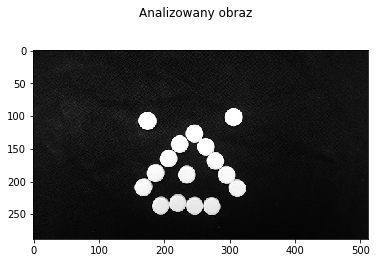

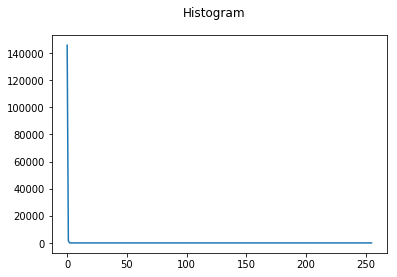

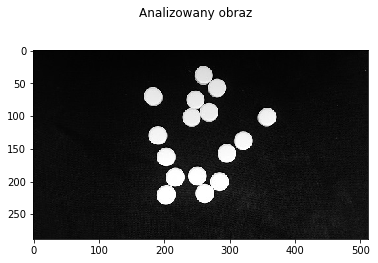

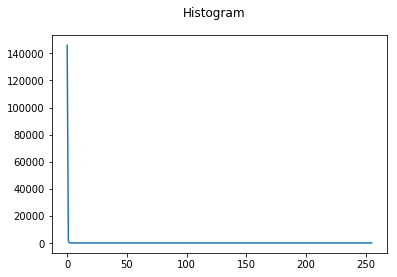

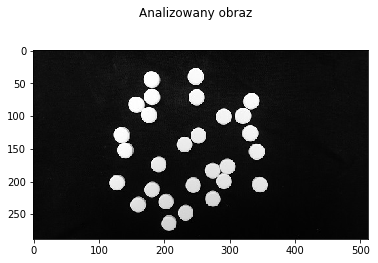

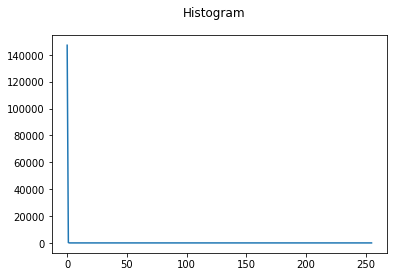

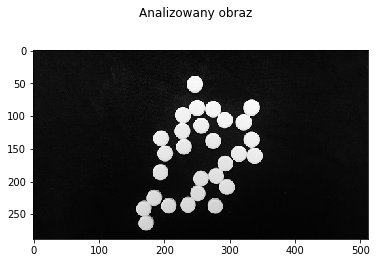

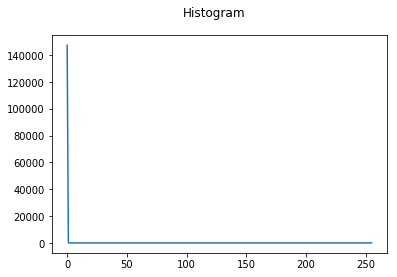

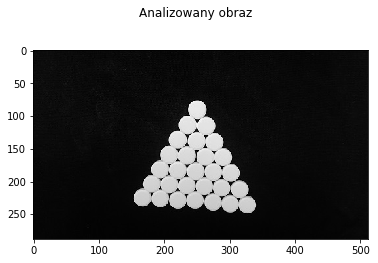

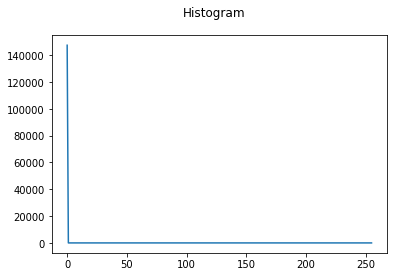

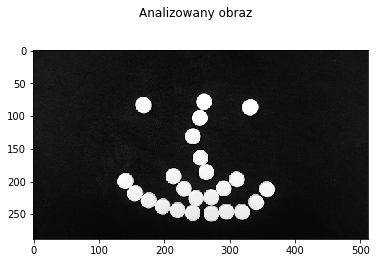

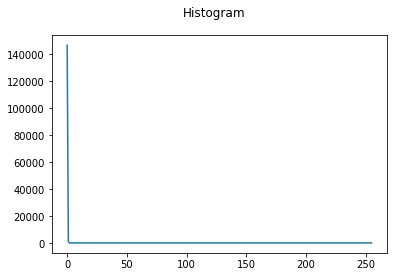

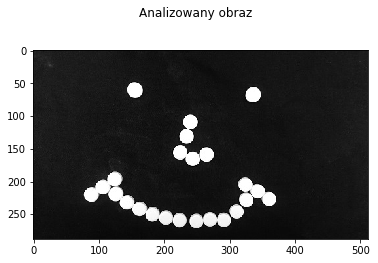

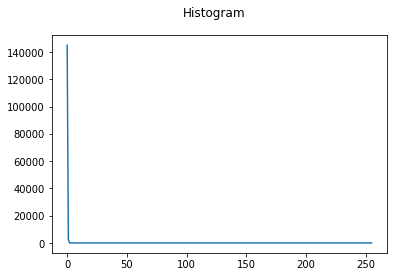

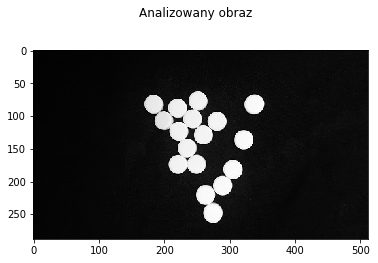

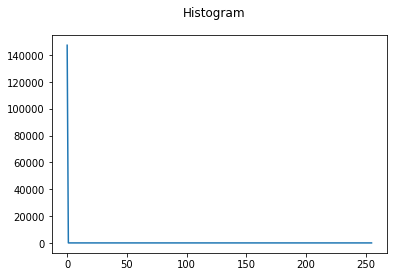

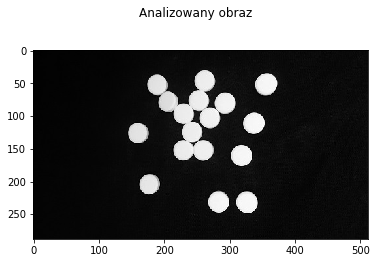

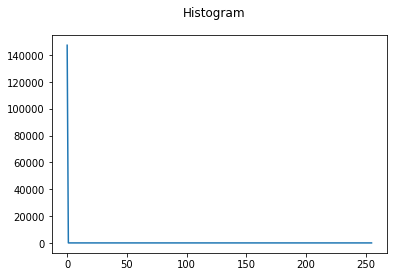

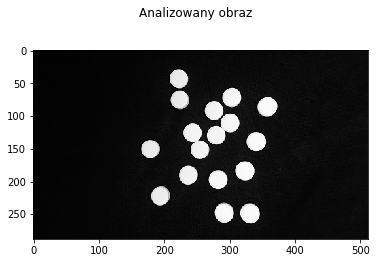

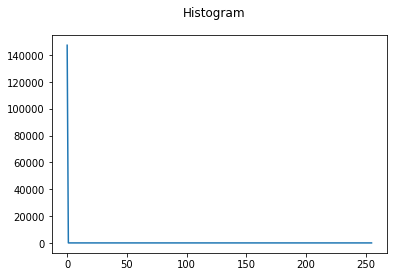

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray


path = 'zdjecia/'
for z in range(1, 19):
    image = io.imread(path + 'z{}.jpg'.format(z))
    image = rgb2gray(image)

    plt.imshow(image, cmap='gray')
    plt.axis('on')
    plt.suptitle('Analizowany obraz')
    plt.show()

    bins=np.arange(0, 257)
    histo = np.histogram(image, bins=bins)

    hist, bins = histo

    plt.plot(bins[:-1], hist)
    plt.suptitle('Histogram')
    plt.show()

Prog binaryzacji:  0.482421875


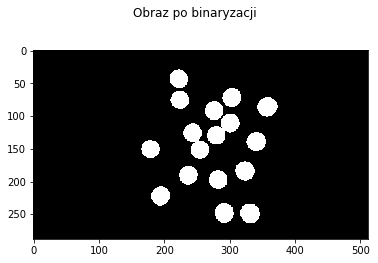

In [3]:
from skimage import filters

th = filters.threshold_otsu(image)
print('Prog binaryzacji: ', th)

binary = image < th

plt.imshow(binary, cmap='binary')
plt.axis('on')
plt.suptitle('Obraz po binaryzacji')
plt.show()

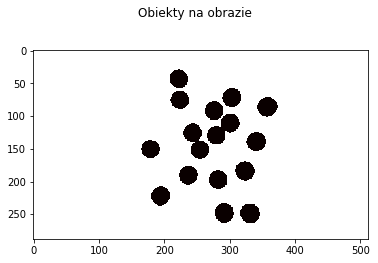

(288, 512)
(288, 512)
2


In [5]:
from scipy import ndimage as ndi
label_objects, nb_labels = ndi.label(binary)

sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0

figures = mask_sizes[label_objects]

plt.imshow(figures, cmap="hot")
plt.axis('on')
plt.suptitle('Obiekty na obrazie')
plt.show()

print(figures.shape)
print(label_objects.shape)
print(nb_labels)

NameError: name 'figures' is not defined

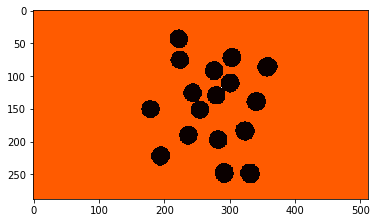

[ 11147 136308      1] [False  True False]
0
1
1
1


In [6]:
plt.imshow(label_objects,cmap='hot')
plt.show()

mask_sizes
print(sizes, mask_sizes)
print(label_objects[250][300])
print(label_objects[100][400])
print(label_objects[100][100])
# print label_objects.size, label_objects.shape
print(np.sum(label_objects == 2))

In [6]:
no_of_object = 2

def cog(labelledImage, objNumber):
    cx = 0
    cy = 0
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                cy = cy + y
                cx = cx + x

    cx = cx / sizes[objNumber]
    cy = cy / sizes[objNumber]

    return int(cy), int(cx)

cogs = []
for i in range(nb_labels):
    cogs.append(cog(label_objects, i+1))

print(cogs)

[(27, 408), (69, 167), (172, 404), (228, 172), (295, 309)]


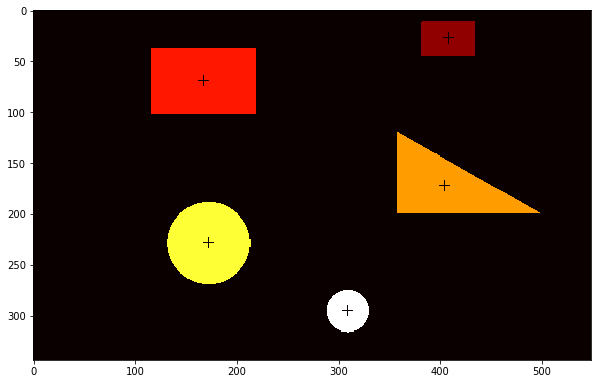

In [7]:
def drawMarkers(image, coords):

    image = np.copy(image)
    
    for item in coords:
        y,x = item
        for j in range(y-5, y+6):
            image[j,x] = 0
        for i in range(x-5, x+6):
            image[y,i] = 0
            
    return image


lo = drawMarkers(label_objects, cogs)
plt.figure(figsize=(10,10))
plt.imshow(lo,cmap='hot')
plt.show()

In [8]:
from operator import itemgetter

cogs2 = sorted(cogs, key=itemgetter(0,1))
print(cogs2)

from numpy.linalg import norm
cogs3 = sorted(cogs, key=lambda tup: norm(tup))
print(cogs3)

for item in cogs3:
    print(norm(item))

[(27, 408), (69, 167), (172, 404), (228, 172), (295, 309)]
[(69, 167), (228, 172), (27, 408), (295, 309), (172, 404)]
180.6931099959265
285.60112044598145
408.8924063858364
427.2072096769904
439.089968002003


In [9]:
import math

p1 = 0
p2 = 1

print(cogs3[p1], cogs3[p2])
print(label_objects.shape[0])

(69, 167) (228, 172)
344


In [10]:
y = cogs3[p1][0] - cogs3[p2][0]
x = cogs3[p1][1] - cogs3[p2][1]
print(x,y)

angle = math.degrees(math.atan2(-y, x)) + 180

print(int(angle))

-5 -159
271


In [11]:
def getFigure(labelledImage, objNumber):
    
    points = []
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                points.append((y,x))

    return points

print(nb_labels)

5


In [12]:
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    print(len(pts))

1801
6695
5705
5144
1380


In [13]:

def cog2(points):
    mx=0
    my=0
    for (y,x) in points:
        mx = mx + x
        my = my + y
    mx = mx/len(points)
    my = my/len(points)
    
    return [my, mx]


for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    
    print('Liczba punktow: ',len(pts),' Srodek ciezkosci: ', cog2(pts))

Liczba punktow:  1801  Srodek ciezkosci:  [27.50916157690172, 408.0144364242088]
Liczba punktow:  6695  Srodek ciezkosci:  [69.0, 167.0]
Liczba punktow:  5705  Srodek ciezkosci:  [172.70306748466257, 404.81297107800174]
Liczba punktow:  5144  Srodek ciezkosci:  [228.5, 172.5]
Liczba punktow:  1380  Srodek ciezkosci:  [295.20217391304345, 309.3550724637681]


In [14]:
from scipy.spatial import distance

def computeBB(points):
    
    s = len(points)
    my,mx = cog2(pts)
    
    r = 0
    for point in points:
         r = r + distance.euclidean(point,(my,mx))**2
            
    return s/(math.sqrt(2*math.pi*r))

In [15]:
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    bb = computeBB(pts)
    
    print('Liczba punktow: ',len(pts), ' Srodek ciezkosci: ', cog2(pts), ' Blair-Bliss: ', bb)

Liczba punktow:  1801  Srodek ciezkosci:  [27.50916157690172, 408.0144364242088]  Blair-Bliss:  0.9321191775590766
Liczba punktow:  6695  Srodek ciezkosci:  [69.0, 167.0]  Blair-Bliss:  0.9284876278556973
Liczba punktow:  5705  Srodek ciezkosci:  [172.70306748466257, 404.81297107800174]  Blair-Bliss:  0.783733613026152
Liczba punktow:  5144  Srodek ciezkosci:  [228.5, 172.5]  Blair-Bliss:  0.9999393281965977
Liczba punktow:  1380  Srodek ciezkosci:  [295.20217391304345, 309.3550724637681]  Blair-Bliss:  0.9999506224749142


In [16]:
def computeFeret(points):
    
    px = [x for (y,x) in points]
    py = [y for (y,x) in points]
    
    fx = max(px) - min(px)
    fy = max(py) - min(py)
    
    return float(fy)/float(fx)    

In [17]:
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    bb = computeBB(pts)
    feret = computeFeret(pts)
    
    print('Liczba punktow: ',len(pts),' Srodek ciezkosci: ', cog2(pts),' Blair-Bliss: ', bb,' Feret: ',feret)

Liczba punktow:  1801  Srodek ciezkosci:  [27.50916157690172, 408.0144364242088]  Blair-Bliss:  0.9321191775590766  Feret:  0.6346153846153846
Liczba punktow:  6695  Srodek ciezkosci:  [69.0, 167.0]  Blair-Bliss:  0.9284876278556973  Feret:  0.6274509803921569
Liczba punktow:  5705  Srodek ciezkosci:  [172.70306748466257, 404.81297107800174]  Blair-Bliss:  0.783733613026152  Feret:  0.5642857142857143
Liczba punktow:  5144  Srodek ciezkosci:  [228.5, 172.5]  Blair-Bliss:  0.9999393281965977  Feret:  0.9753086419753086
Liczba punktow:  1380  Srodek ciezkosci:  [295.20217391304345, 309.3550724637681]  Blair-Bliss:  0.9999506224749142  Feret:  1.0
